<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/RBDQuanserAero_DHSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy
from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from IPython.display import display, Math, Latex

In [12]:
alpha, theta, phi, gamma, R, Omega, I = dynamicsymbols("alpha, theta, phi,gamma, R, Omega, I")
init_vprinting
t, I_1, I_2, I_3, l= symbols('t, I_1, I_2, I_3, l')
init_vprinting()

In [3]:
dtheta = theta.diff(t);ddtheta = dtheta.diff(t)
dalpha = alpha.diff(t);ddalpha = dalpha.diff(t)
dgamma = gamma.diff(t);ddamma = dgamma.diff(t)
dphi = phi.diff(t);ddphi = dphi.diff(t)


R1_phi = Matrix([[1, 0, 0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
R3_alpha = Matrix([[cos(alpha),-sin(alpha),0],[sin(alpha),cos(alpha),0],[0,0,1]])
R1_gamma = Matrix([[1, 0, 0],[0, cos(gamma), -sin(gamma)],[0, sin(gamma),cos(gamma)]])
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [ ]:
R1_phi

In [10]:
II = Matrix([[I_1, 0, 0],[0, I_2, 0],[0,0,I_3]])

In [11]:
II

⎡II₁   0    0 ⎤
⎢             ⎥
⎢ 0   II₂   0 ⎥
⎢             ⎥
⎣ 0    0   II₃⎦

Image Credits: Bhashitha Maduranga Nawaratne bhashitha614@gmail.com

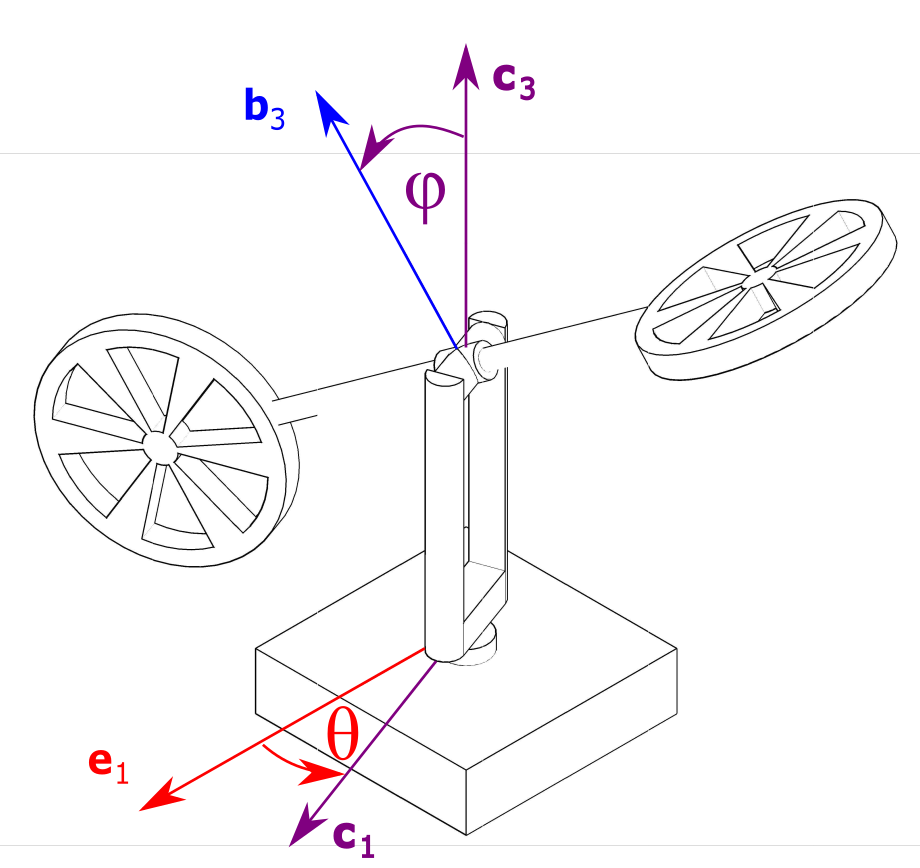

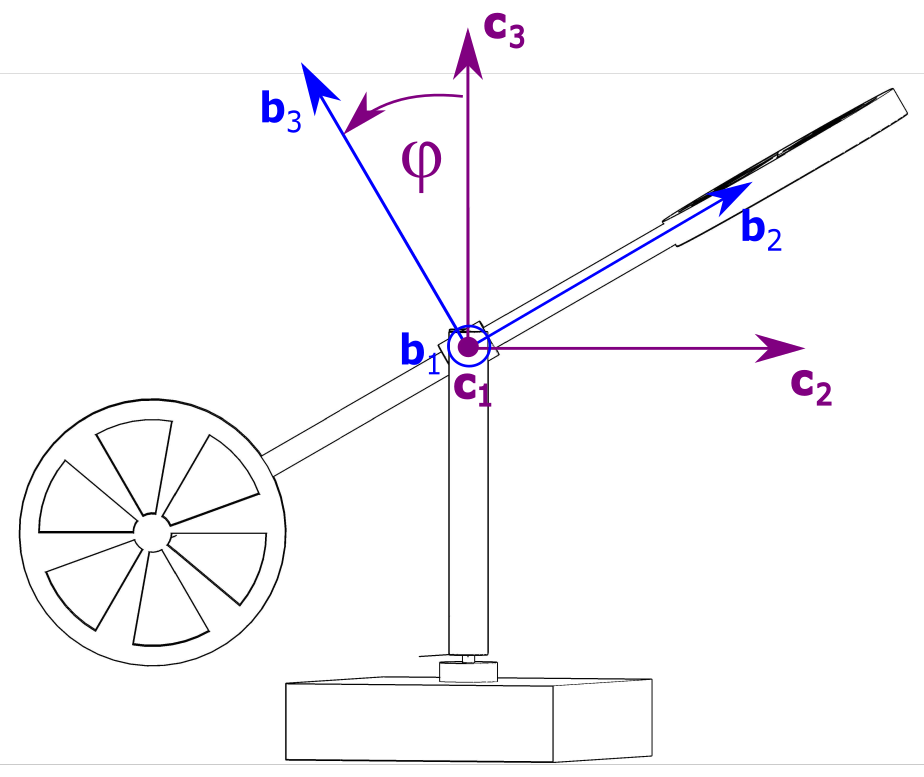

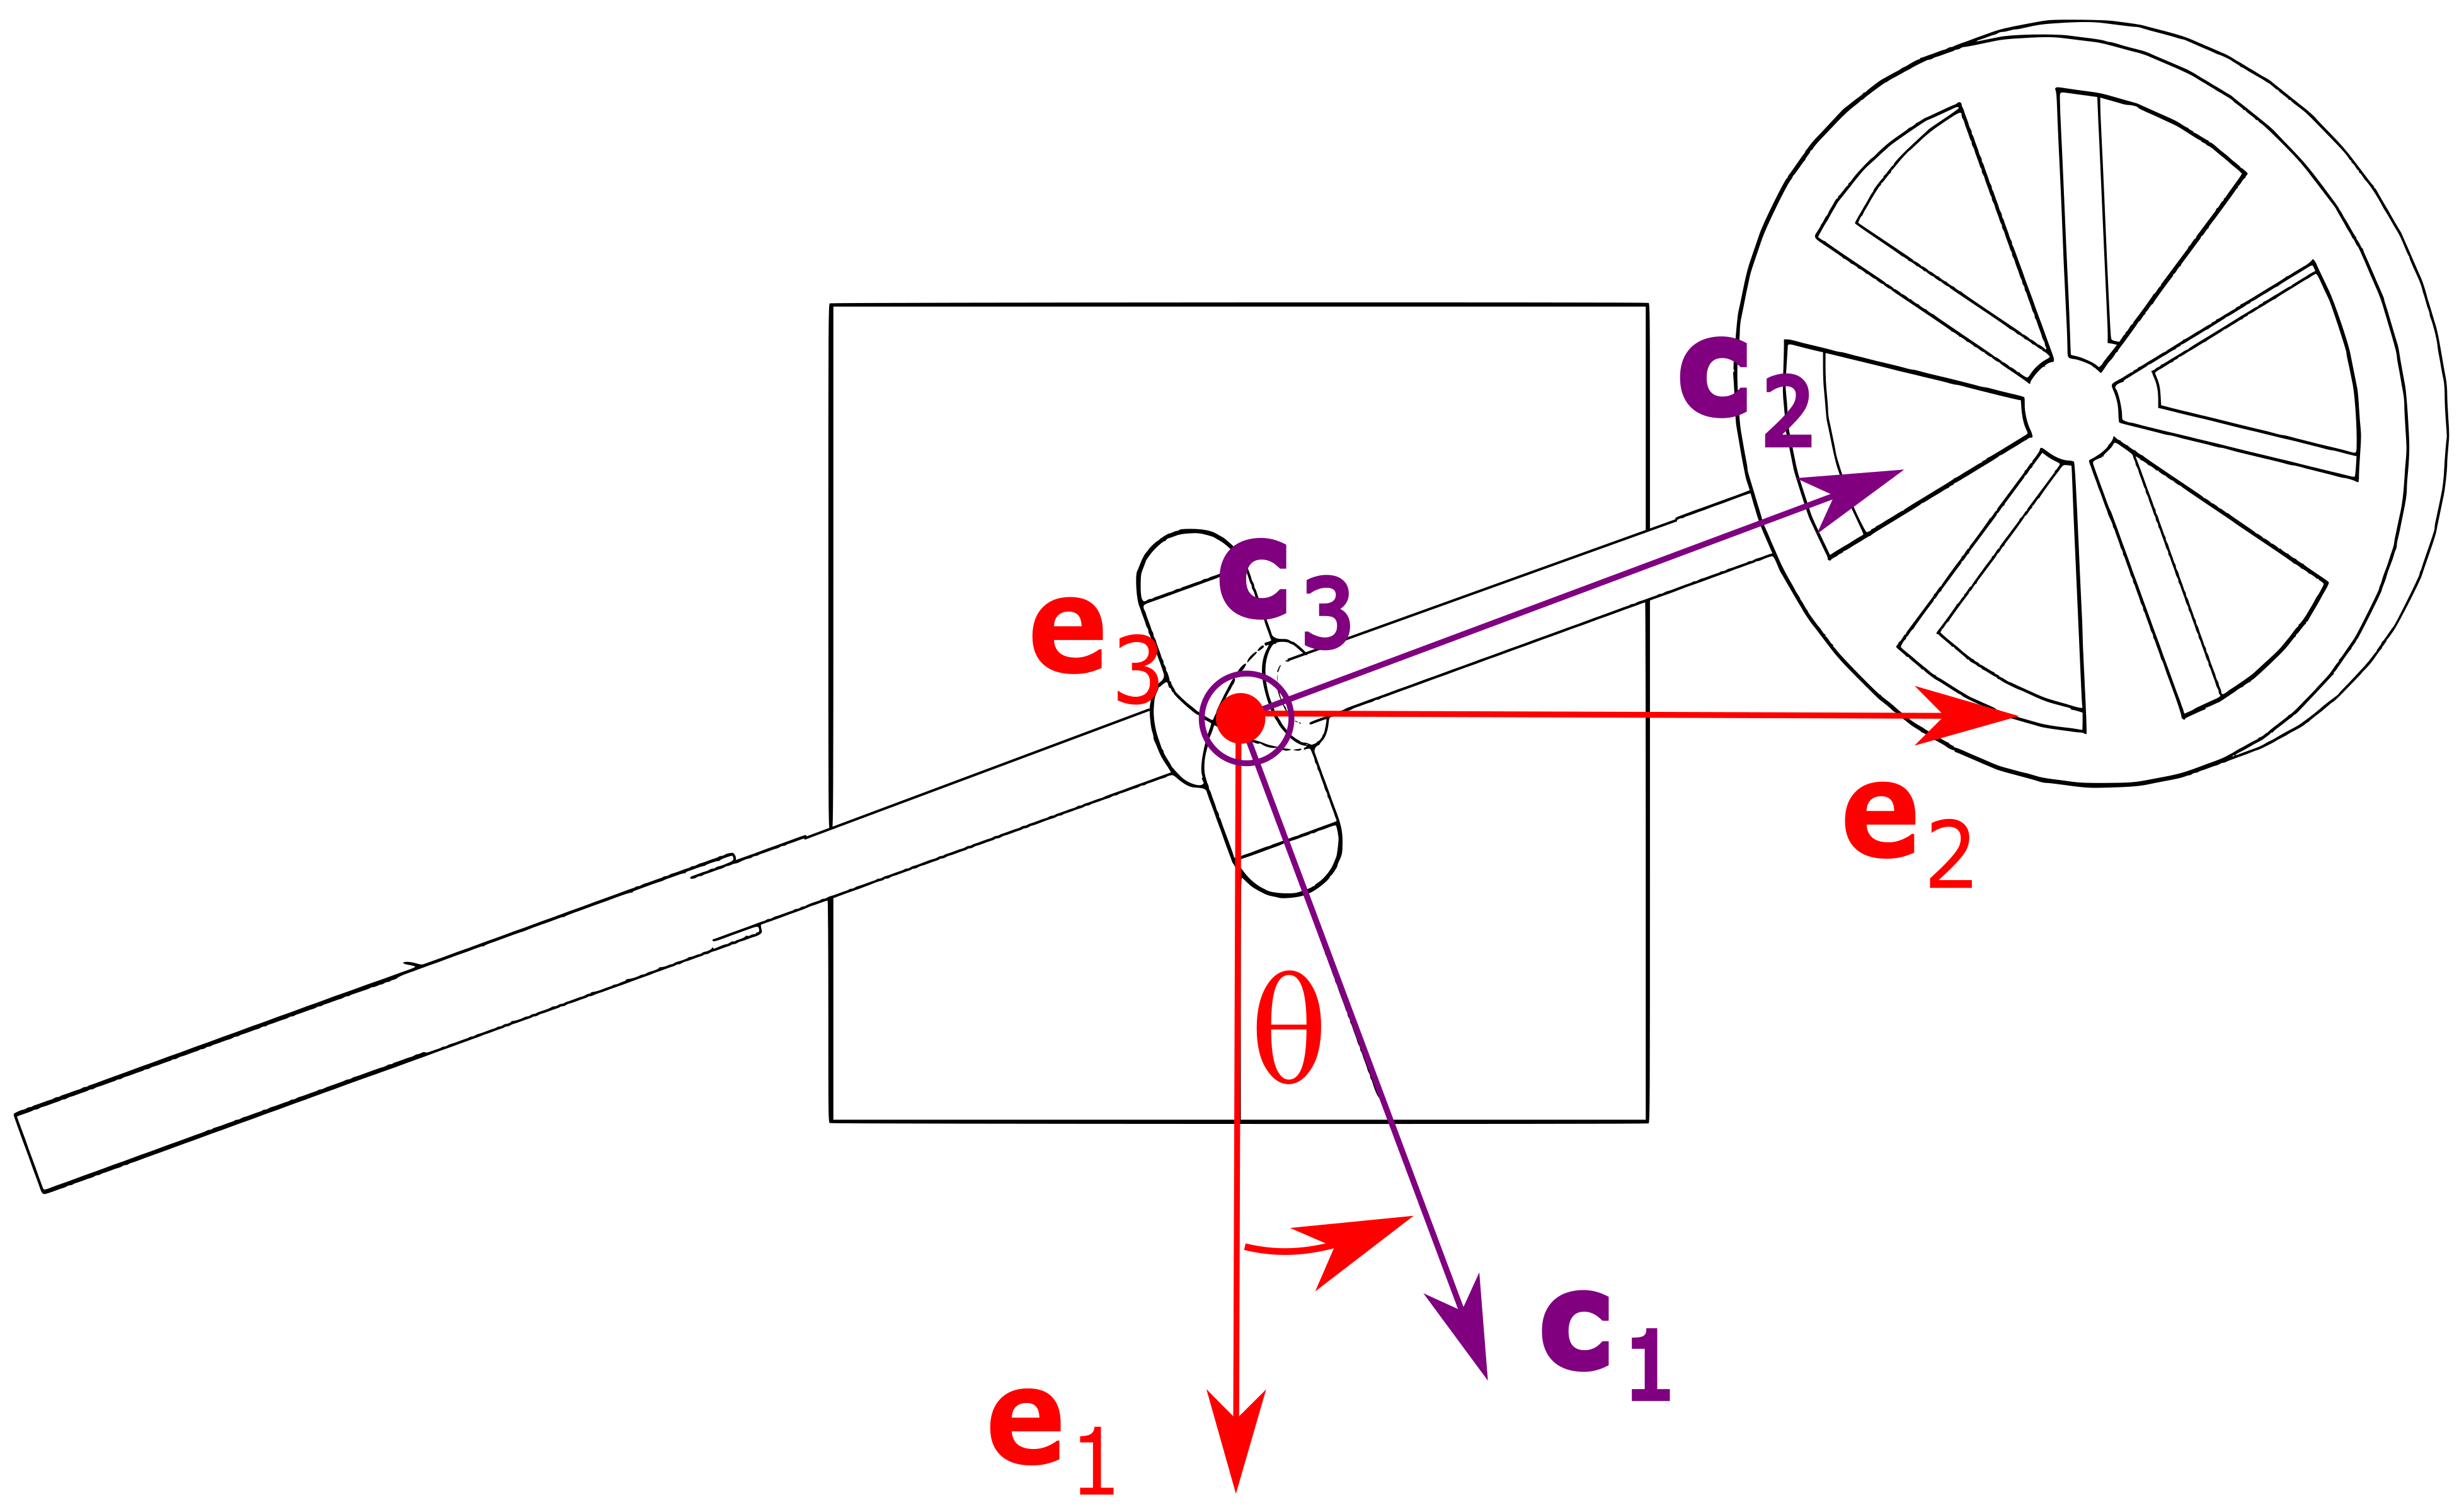

# The Configuration

Let us take inertial frame as $\mathbf{e}$, which is fixed to body part E. And $\mathbf{O}$ as the original of the $\mathbf{e}$-frame. Let $\mathbf{c}$ be another orthongonal frame such that it moves with respect to $\mathbf{e}$ in such a way that $\mathbf{c}_3\equiv \mathbf{e}_3$ and $\mathbf{c}$-frame is always fixed to body part c. Therefore

\begin{align*}
\mathbf{c}=\mathbf{e}\,R_3(\theta)
\end{align*}

\begin{align*}
R_3(\theta)=\begin{bmatrix}
\cos{\theta}&-\sin{\theta}&0\\
\sin{\theta}&\cos{\theta}&0\\
0&0&1
\end{bmatrix}.
\end{align*}

Let $\mathbf{b}$ be another orthonomal frame such that it moves with respect to $\mathbf{c}$ in such a way that $\mathbf{b}_1\equiv \mathbf{c}_1$ and $\mathbf{b}$ is always fixed to body part $\mathbf{B}$.

\begin{align*}
\mathbf{b}=\mathbf{c}\,R_1(\phi)
\end{align*}

\begin{align*}
R_1(\phi)=\begin{bmatrix}
1&0&0\\
0&\cos{\phi}&-\sin{\phi}\\
0&\sin{\phi}&\cos{\phi}
\end{bmatrix}.
\end{align*}

Origin of $\mathbf{e}$-frame and $\mathbf{c}$-frame coincide with each other. Let's take B as the origin of $\mathbf{b}$-frame.

\begin{align*}
\mathbf{b}=\mathbf{c}R_3(\theta)=\mathbf{e}R_1(\phi)R_3(\theta)=\mathbf{e}R
\end{align*}

Which gives

\begin{align*}
R=R_1(\phi)R_3(\theta)
\end{align*}

\begin{align*}
\dot{R}=\dot{R}_1R_3+R_1\dot{R}_3=R_1\widehat{\Omega}_1R_3+R_1{R}_3\widehat{\Omega}_3=R\widehat{\Omega}
\end{align*}

\begin{align*}
\widehat{\Omega}=R_3^T\widehat{\Omega}_1R_3+\widehat{\Omega}_3
\end{align*}

which gives
\begin{align*}
\Omega=R_3^T(\theta)\Omega_1+{\Omega}_3
\end{align*}


# The actuation moments

\begin{align*}
\mathbf{e}\tau=\mathbf{b}\tau_b=\mathbf{b}\begin{bmatrix}
u_1\sin{\alpha}+u_2\sin{\beta}\\
0\\
u_1\cos{\alpha}+u_2\cos{\beta}
\end{bmatrix}
\end{align*}

# Equations of motion

\begin{align*}
\dot{R}=\widehat{\omega}R\\
\pi=R\mathbb{I}R^T\omega\\
\dot{\pi}=R\tau_b=\tau_u
\end{align*}

In [ ]:
R

#Trajectory Tracking

In this section we investigate the problem of ensuring asymptotic tracking of a sufficiently smooth trajectory $R_r(t)$ in $\mathbb{R}^3\times SO(3)$.

##Configuration error

We notice that the configuration space $SO(3)$ is a group. It is closed under the multiplication operation defined as follows.

Now one can define the configuration error between a system configuration $R\in \mathbb{R}^3\times SO(3)$ and a reference configuration $R_r\in \mathbb{R}^3\times SO(3)$ in a global sense as  
\begin{align}
R_e\triangleq R^{-1}R_r\in  SO(3),
\end{align}
or alternatively as
\begin{align}
R_e\triangleq R_rR^{-1}\in SO(3),
\end{align}

The former is defined as the *left-invariant* error while the latter is defined as the *right-invariant* error.

Notice that both these errors are in the configuration space $SO(3)$ and not in the spatial momentum space of $SO(3)$.

##Tracking error dynamics

Let $R_r(t)$ be a desired trajectory and $\omega_r(t)$ be such that $\widehat{\omega}_r(t)=\dot{R}_rR_r^T$. In line with the system define the reference spatial angular momentum $\pi_r\triangleq R_r\mathbb{I}R_r^T\omega_r$

Define the configurarion error
\begin{align}
R_e&=R_rR^T.
\end{align}
Then the spatial angular velcity of the tracking error is defined by
\begin{align}
\widehat{\omega}_e&\triangleq \dot{R}_eR_e^T=\widehat{\omega}_r(t)-R_e\widehat{\omega}(t)R_e^T
\end{align}
and hence that
\begin{align}
\omega_e&=\omega_r-R_e\omega.
\end{align}
Define the angular momentum error as
\begin{align}
\pi_e\triangleq R\mathbb{I}R_r^T\omega_e=R\mathbb{I}R_r^T(\omega_r-R_e\omega)=R\mathbb{I}R_r^T\omega_r-R\mathbb{I}R^T\omega=R_e^T\pi_r-\pi.
\end{align}


Differentiating $\pi_e$ we have
\begin{align}
\dot{\pi}_e&=R_e^T(\dot{\pi}_r-\omega_e\times \pi_r)-\dot{\pi}=R_e^T(R_r\dot{\Pi}_r+(\omega_r-\omega_e)\times \pi_r)-\dot{\pi}=(R\dot{\Pi}_r+\omega\times \pi_r)-\dot{\pi}
\end{align}



Thus we have the error dynamics
\begin{align}
\dot{R}_e&=\widehat{\omega}_eR_e,\\
\dot{\pi}_e&=(R\dot{\Pi}_r+\omega\times \pi_r)-\tau_u
\end{align}

## Feedforward plus PID control

\begin{align}
\dot{e}_{I_R}&=e_R,\\
\tau_u&=(R\dot{\Pi}_r+\omega\times \pi_r)+k_{P_R}e_R+k_{D_R}\pi_e+k_{I_R}e_{I_R}
\end{align}

### The proportional term

Let
\begin{align}
K&=\mathrm{diag}\{\mathbb{K}_1,\mathbb{K}_2,\mathbb{K}_3\}.
\end{align}

for some three distinct constants $\mathbb{K}_1,\mathbb{K}_2,\mathbb{K}_3$.

Then $e_R$ is given by
\begin{align}
\widehat{e}_R&=\frac{1}{2}\left(R_eK-KR_e^T\right).
\end{align}


## Implementation

To implement we need $R_e, \pi_e, e_R$ using the measurments $\theta, \phi, \dot{\theta}, \dot{\phi},$

\begin{align*}
R_e&=R_rR^T=R_1(\phi_r)R_3(\theta_r)R_3^T(\theta)R_1^T(\phi)=R_1(\phi_r)R_3(\theta_r-\theta)R_1^T(\phi)
\end{align*}
\begin{align*}
\Omega=R_3^T(\theta)\Omega_1+{\Omega}_3=R_3^T\begin{bmatrix}\dot{\phi}\\0\\0
\end{bmatrix}+\begin{bmatrix}0\\0\\\dot{\theta}
\end{bmatrix}
\end{align*}
\begin{align*}
\pi=R\mathbb{I}\Omega
\end{align*}
\begin{align*}
\pi_e=R_e^T\pi_r-\pi.
\end{align*}

\begin{align}
\dot{e}_{I_R}&=e_R,\\
R\tau_b&=(R\dot{\Pi}_r+\omega\times \pi_r)+k_{P_R}e_R+k_{D_R}\pi_e+k_{I_R}e_{I_R}
\end{align}

which gives

\begin{align}
\dot{e}_{I_R}&=e_R,\\
\tau_b&=(\dot{\Pi}_r+\Omega\times R^T\pi_r)+k_{P_R}R^Te_R+k_{D_R}(R_r^T\pi_r-\mathbb{I}\Omega)+k_{I_R}R^Te_{I_R}
\end{align}